To do's:

Compare the weekly statistics (mean, median, mode) for number of cases and deaths across US.
Compare the data against other countries of the world. Data at: https://ourworldindata.org/coronavirus-source-data
Choose at least 5 similar populations countries to compare.
Plot weekly trends (cases and deaths) of US and compare other countries. Utilize aggregrate, normalized by population, difference in cases, and log normalized values. (hint: do normalization: number of cases per 100,000, and then use np.log10())
Identify the peak weeks of the cases and deaths in US and other countries. Try to do background research to see what the reasoning for the peaks can be (holidays, vacations, travel, weather, etc). Explain with a description in the notebooks.

# Item 1:  Compare the weekly statistics (mean, median, mode) for number of cases and deaths across US.

In [1]:
# libraries & settings

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
dfCasesWide = pd.read_csv("Data/covid_confirmed_usafacts.csv")
dfDeathWide = pd.read_csv("Data/covid_deaths_usafacts.csv")
dfPopulation = pd.read_csv("Data/covid_county_population_usafacts.csv")

In [3]:
# Function to summarize data frames
# mode is not an agg function in pandas, so we will have to create an alternate way to acieve that

def nullcounts(ser):
    return ser.isnull().sum()

def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max'],
                    numeric_only=True, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)


custom_describe(dfCasesWide)


,countyFIPS,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,2020-08-23,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,...,2022-11-02,2022-11-03,2022-11-04,2022-11-05,2022-11-06,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18,2022-11-19,2022-11-20,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-03,2022-12-04,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-10,2022-12-11,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30,2022-12-31,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-07,2023-01-08,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-14,2023-01-15,2023-01-16,2023-01-17,2023-01-18,2023-01-19,2023-01-20,2023-01-21,2023-01-22,2023-01-23,2023-01-24,2023-01-25,2023-01-26,2023-01-27,2023-01-28,2023-01-29,2023-01-30,2023-01-31,2023-02-01,2023-02-02,2023-02-03,2023-02-04,2023-02-05,2023-02-06,2023-02-07,2023-02-08,2023-02-09,2023-02-10,2023-02-11,2023-02-12,2023-02-13,2023-02-14,2023-02-15,2023-02-16,2023-02-17,2023-02-18,2023-02-19,2023-02-20,2023-02-21,2023-02-22,202

## Creating graphs for cases

In [4]:
# Starting on the CASES data

df = custom_describe(dfCasesWide)

# dropping state and county fips
df.drop(['countyFIPS', 'StateFIPS'], inplace = True, axis = 1)

#Transposing data, so dates are row value
df = df.T

# caluculating the difference between rows, to get a delta value for cases.  This turns our data from cumulative to
# daily changes
dfDelta = df.diff(periods=1, axis=0)

# There is one na item in our dataframe, I am going to drop it
dfDelta.dropna()

# resetting index so we can group by date
dfDelta.reset_index(inplace = True)

# resetting "index" name to date
dfDelta.rename(columns={"index": "Date"}, inplace=True)

# changing date to date (not object)
dfDelta['Date']= pd.to_datetime(dfDelta['Date'])- pd.to_timedelta(7, unit='d')

# dropping 1 na
dfDelta.dropna(inplace = True)


In [5]:
# Grouping delta dataframe by week.  I included "nullcounts" to keep the header names

# Creating MEAN dataset
dfDeltaMean = dfDelta.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()


# Creating MEDIAN dataset
dfDeltaMedian = dfDelta.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()


# Creating MODE Dataset
dfDeltaMode = dfDelta.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].agg(pd.Series.mode)
dfDeltaMode.rename(columns={"median": "mode"}, inplace=True)



C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


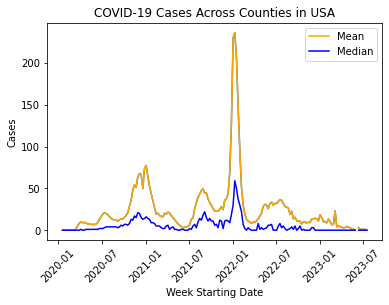

In [11]:
# plot 
# Can not plot mode with mean/median because there are multiple modes per week
plt.plot(dfDeltaMean.index, dfDeltaMean['mean'])

plt.plot(dfDeltaMean.index, dfDeltaMean['mean'], color = 'orange', label = 'Mean')
plt.plot(dfDeltaMedian.index, dfDeltaMedian['median'], color = 'blue', label = 'Median')
plt.xlabel('Week Starting Date') # x axis label
plt.ylabel('Cases') # y axis label
plt.title('COVID-19 Cases Across Counties in USA') # Title
plt.xticks(rotation=45) # rotate dates
plt.legend()



## Creating graphs for Deaths

In [15]:
# Starting on the DEATHS data

df = custom_describe(dfDeathWide)

# dropping state and county fips
df.drop(['countyFIPS', 'StateFIPS'], inplace = True, axis = 1)

#Transposing data, so dates are row value
df = df.T

# caluculating the difference between rows, to get a delta value for cases.  This turns our data from cumulative to
# daily changes
dfDelta = df.diff(periods=1, axis=0)

# There is one na item in our dataframe, I am going to drop it
dfDelta.dropna()

# resetting index so we can group by date
dfDelta.reset_index(inplace = True)

# resetting "index" name to date
dfDelta.rename(columns={"index": "Date"}, inplace=True)

# changing date to date (not object)
dfDelta['Date']= pd.to_datetime(dfDelta['Date'])- pd.to_timedelta(7, unit='d')

# dropping 1 na
dfDelta.dropna(inplace = True)


In [16]:
# Grouping delta dataframe by week.  I included "nullcounts" to keep the header names

# Creating MEAN dataset
dfDeltaMean = dfDelta.groupby([pd.Grouper(key='Date', freq='W')])['mean', 'nullcounts'].mean()


# Creating MEDIAN dataset
dfDeltaMedian = dfDelta.groupby([pd.Grouper(key='Date', freq='W')])['median', 'nullcounts'].median()

C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
C:\Users\leena\anaconda3\envs\MSIA\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


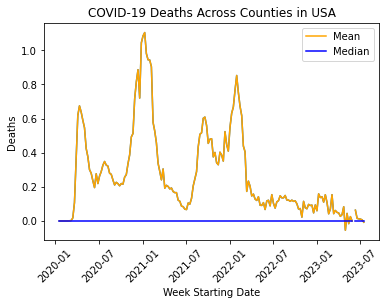

In [18]:
# plot 
plt.plot(dfDeltaMean.index, dfDeltaMean['mean'])

plt.plot(dfDeltaMean.index, dfDeltaMean['mean'], color = 'orange', label = 'Mean')
plt.plot(dfDeltaMedian.index, dfDeltaMedian['median'], color = 'blue', label = 'Median')
plt.xlabel('Week Starting Date') # x axis label
plt.ylabel('Deaths') # y axis label
plt.title('COVID-19 Deaths Across Counties in USA') # Title
plt.xticks(rotation=45) # rotate dates
plt.legend()
